In [1]:
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [3]:
from fastai2.vision.all import *

In [4]:
dblock = DataBlock(get_x = lambda r: f"data/jpeg/train{r['image_name']}",
                  get_y = lambda r : r["target"],)

In [5]:
train_df = pd.read_csv('data/train.csv')

In [6]:
train_df.target.value_counts()

0    32542
1      584
Name: target, dtype: int64

In [7]:
train_df = train_df.sample(n = 1000)

In [8]:
dblock = DataBlock((ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(0.3,42),
                   get_x = lambda r: f"data/jpeg/train/{r['image_name']}.jpg",
                   get_y = lambda r : str(r["target"]),
                   item_tfms = Resize(size=224),)


In [9]:
dls = dblock.dataloaders(train_df,bs=64)

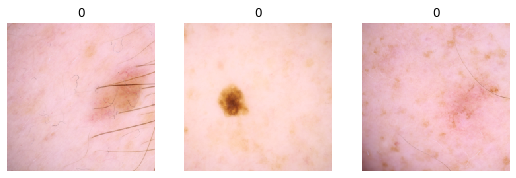

In [11]:
dls.show_batch(nrows=1, ncols=3)

In [12]:
learn = cnn_learner(dls, resnet18)

In [ ]:
learn.fit_one_cycle(n_epoch=6, lr=5e-2)

epoch,train_loss,valid_loss,time
0,1.049039,0.853693,02:32
